# I. Regression

# 1. Linear Regression

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

### 2.1 Explore the dataset

In [2]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 10.9+ KB


In [4]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


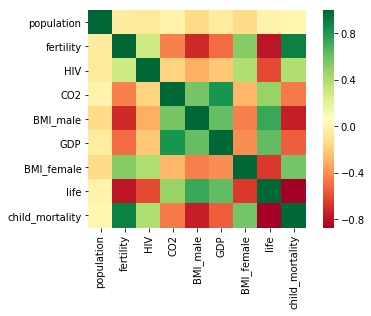

In [5]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

### 2.2. Fit & Predict for regression

In [6]:
# Create arrays for features and target variable
x = df['fertility'].values
y = df['life'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(x.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


[139]
[139]
[97]
[139]
[139]
0.6162438752151919


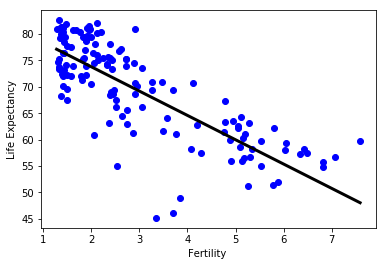

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1) 
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_fertility, y_life))

# Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility ')
plt.show()

### 2.3. All features

In [10]:
# Import necessary modules


features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg_all = LinearRegression()

# Fit the regression to the training data
reg_all.fit(x_train, y_train)

# Print accuracy
print(reg_all.score(features, y_life))


[139]
[139]
[97]
[139]
[139]
0.8914651485793135


### 2.4. Evaluate regression models

In [11]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x_fertility = df['fertility'].values.reshape(-1,1) 
y_life = df['life'].values.reshape(-1,1)

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, x_fertility, y_life, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[139]
[139]
[139]
[111]
[28]
[28]
[111]
[28]
[28]
[111]
[28]
[28]
[111]
[28]
[28]
[112]
[27]
[27]
[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119
